In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
census_files = glob.glob("*.csv")

# Create an empty list to hold the DataFrames
dfs = []

# Loop through each file in the list
for file in census_files:
    # Load the file into a DataFrame
    df = pd.read_csv(file)
    
    # Append the DataFrame to the list of DataFrames
    dfs.append(df)

# Concatenate all the DataFrames into a single DataFrame
us_census = pd.concat(dfs, ignore_index=True)
print(us_census.columns)
print(us_census.dtypes)



Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [3]:
print(us_census.head())
us_census['Income'] = us_census['Income'].str.replace('$','')
for col in us_census.columns[3:]:
    us_census[col] = us_census[col].str.replace('%','')
    

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\2014235137.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census['Income'] = us_census['Income'].str.replace('$','')


In [4]:
us_census['State'] = us_census['State'].astype(str)
print(us_census.head())
print(us_census.dtypes)


   Unnamed: 0       State  TotalPop            Hispanic               White  \
0           0     Alabama   4830620  3.7516156462584975     61.878656462585   
1           1      Alaska    733375   5.909580838323351  60.910179640718574   
2           2     Arizona   6641928  29.565921052631502  57.120000000000026   
3           3    Arkansas   2958208   6.215474452554738   71.13781021897813   
4           4  California  38421464  37.291874687968054   40.21578881677474   

                Black               Native               Asian  \
0   31.25297619047618   0.4532312925170065  1.0502551020408146   
1  2.8485029940119775    16.39101796407186   5.450299401197604   
2  3.8509868421052658     4.35506578947368   2.876578947368419   
3  18.968759124087573   0.5229197080291965  1.1423357664233578   
4   5.677396405391911  0.40529206190713685  13.052234148776776   

               Pacific             Income            GenderPop  
0  0.03435374149659865  43296.35860306644    2341093M_2489527F 

In [5]:
for col in us_census[5:10]:
    us_census.iloc[:, 3:10] = us_census.iloc[:, 3:10].astype(float)
    
print(us_census.dtypes)

C:\Users\HP\AppData\Local\Temp\ipykernel_9668\4250667670.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  us_census.iloc[:, 3:10] = us_census.iloc[:, 3:10].astype(float)


Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
dtype: object


In [6]:
us_census[['MalePop', 'FemalePop']] = us_census['GenderPop'].str.split(pat='_',n=1,expand=True)
print(us_census.columns)
us_census['MalePop'] = us_census['MalePop'].str.replace(r'\D+', '', regex=True)
us_census['FemalePop'] = us_census['FemalePop'].str.replace(r'\D+', '', regex=True)
print(us_census.head())
# us_census['MalePop'] = us_census['MalePop'].astype(int)
# us_census['FemalePop'] = us_census['FemalePop'].astype(int)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'MalePop',
       'FemalePop'],
      dtype='object')
   Unnamed: 0       State  TotalPop   Hispanic      White      Black  \
0           0     Alabama   4830620   3.751616  61.878656  31.252976   
1           1      Alaska    733375   5.909581  60.910180   2.848503   
2           2     Arizona   6641928  29.565921  57.120000   3.850987   
3           3    Arkansas   2958208   6.215474  71.137810  18.968759   
4           4  California  38421464  37.291875  40.215789   5.677396   

      Native      Asian   Pacific        Income            GenderPop  \
0   0.453231   1.050255  0.034354  43296.358603    2341093M_2489527F   
1  16.391018   5.450299  1.058683  70354.743902      384160M_349215F   
2   4.355066   2.876579  0.167632  54207.820955    3299088M_3342840F   
3   0.522920   1.142336  0.146861  41935.633968    1451913M_1506295F   
4   0.405292  13.0522

In [7]:
print(us_census.dtypes)

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
MalePop        object
FemalePop      object
dtype: object


In [8]:
## Check for null values first in whole dataframe
us_census.isnull().sum().sort_values()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Income        0
GenderPop     0
MalePop       0
FemalePop     0
Pacific       5
dtype: int64

In [9]:
## We can see that only pacific has 5 null values, but this is not the case, 
## let's verify that

us_census['FemalePop'].values

array(['2489527', '349215', '3342840', '1506295', '19334329', '2630239',
       '2630239', '1841615', '478041', '340810', '10045763', '5123362',
       '5123362', '696428', '806083', '6556862', '3333382', '1558931',
       '1558931', '1453125', '2233145', '2364097', '679019', '', '',
       '3455936', '5038598', '2727005', '1536358', '3081445', '3081445',
       '', '939759', '1390901', '670717', '4561386', '4561386', '1051703',
       '10131373', '5049925', '353677', '5913084', '5913084', '1942789',
       '1990780', '6534215', '1869213', '543273', '543273', '2455167',
       '419713', '3331859', '13367298', '1444150', '1444150', '318031',
       '4195682', '3497739', '937789', '2890732'], dtype=object)

In [10]:
us_census['MalePop'].values
us_census['MalePop'] = us_census['MalePop'].astype('Int64')

In [11]:
## In above result we can see that there are certain string which are empty
## They are not classified as "null" because the string is there
## its just that the string is of length 0

## Let's check the records with 0 len strings
is_null = us_census['FemalePop'] == ''

us_census[is_null]

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
23,5,Maryland,5930538,8.472498,52.679050,30.677754,0.203096,5.325414,0.036285,78765.400725,2872643M_F,2872643,
24,0,Maryland,5930538,8.472498,52.679050,30.677754,0.203096,5.325414,0.036285,78765.400725,2872643M_F,2872643,
31,1,Montana,1014699,3.268889,86.415556,0.429259,7.060741,0.570370,0.072222,47645.682836,510163M_F,510163,


In [12]:
## Replace the '' with '0'
us_census[is_null] = us_census[is_null].apply(lambda x: x.replace('','0'))

In [13]:
## Now we can convert it to int

us_census['FemalePop'] = us_census['FemalePop'].astype('int64')

In [14]:
## Check the values which were '' before to verify

us_census[is_null]
print(us_census['FemalePop'].values)

[ 2489527   349215  3342840  1506295 19334329  2630239  2630239  1841615
   478041   340810 10045763  5123362  5123362   696428   806083  6556862
  3333382  1558931  1558931  1453125  2233145  2364097   679019        0
        0  3455936  5038598  2727005  1536358  3081445  3081445        0
   939759  1390901   670717  4561386  4561386  1051703 10131373  5049925
   353677  5913084  5913084  1942789  1990780  6534215  1869213   543273
   543273  2455167   419713  3331859 13367298  1444150  1444150   318031
  4195682  3497739   937789  2890732]


In [15]:
## We can see that they have now 0

## Also check dtype

us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
MalePop         Int64
FemalePop       int64
dtype: object

In [16]:
# Boolean indexing to filter rows with femalepop of 0
mask = us_census['FemalePop'] == 0

# Replacing femalepop of 0 with totalpop - malepop
us_census.loc[mask, 'FemalePop'] = us_census['TotalPop'] - us_census['MalePop']
us_census['FemalePop'].values

array([ 2489527,   349215,  3342840,  1506295, 19334329,  2630239,
        2630239,  1841615,   478041,   340810, 10045763,  5123362,
        5123362,   696428,   806083,  6556862,  3333382,  1558931,
        1558931,  1453125,  2233145,  2364097,   679019,  3057895,
        3057895,  3455936,  5038598,  2727005,  1536358,  3081445,
        3081445,   504536,   939759,  1390901,   670717,  4561386,
        4561386,  1051703, 10131373,  5049925,   353677,  5913084,
        5913084,  1942789,  1990780,  6534215,  1869213,   543273,
         543273,  2455167,   419713,  3331859, 13367298,  1444150,
        1444150,   318031,  4195682,  3497739,   937789,  2890732],
      dtype=int64)

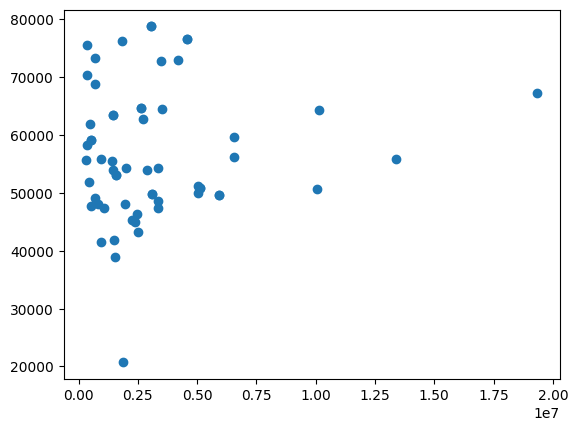

In [17]:
import matplotlib.pyplot as plt

plt.scatter(us_census['FemalePop'],us_census['Income'])
plt.show()

In [18]:
us_census['FemalePop'].duplicated()
us_census['MalePop'].duplicated()
us_census['FemalePop'] = us_census['FemalePop'].drop_duplicates()
us_census['MalePop'] = us_census['MalePop'].drop_duplicates()


Text(0, 0.5, 'Income')

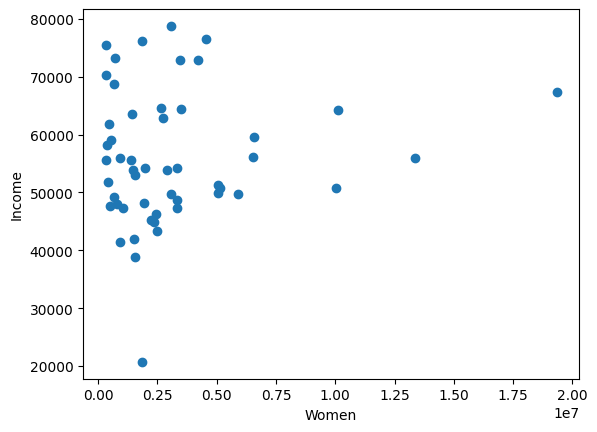

In [19]:
plt.scatter(us_census['FemalePop'],us_census['Income'])
plt.xlabel('Women')
plt.ylabel('Income')
# plt.show()

In [20]:
print(us_census.head())

   Unnamed: 0       State  TotalPop   Hispanic      White      Black  \
0           0     Alabama   4830620   3.751616  61.878656  31.252976   
1           1      Alaska    733375   5.909581  60.910180   2.848503   
2           2     Arizona   6641928  29.565921  57.120000   3.850987   
3           3    Arkansas   2958208   6.215474  71.137810  18.968759   
4           4  California  38421464  37.291875  40.215789   5.677396   

      Native      Asian   Pacific        Income            GenderPop  \
0   0.453231   1.050255  0.034354  43296.358603    2341093M_2489527F   
1  16.391018   5.450299  1.058683  70354.743902      384160M_349215F   
2   4.355066   2.876579  0.167632  54207.820955    3299088M_3342840F   
3   0.522920   1.142336  0.146861  41935.633968    1451913M_1506295F   
4   0.405292  13.052234  0.351410  67264.782303  19087135M_19334329F   

    MalePop   FemalePop  
0   2341093   2489527.0  
1    384160    349215.0  
2   3299088   3342840.0  
3   1451913   1506295.0  
4  1

In [21]:
us_census['Pacific'].values

array([3.43537415e-02, 1.05868263e+00, 1.67631579e-01, 1.46861314e-01,
       3.51410384e-01,            nan,            nan, 1.85990338e-02,
                  nan, 2.96089385e-02, 5.15100671e-02, 4.66019417e-02,
       4.66019417e-02, 8.75886076e+00, 1.27181208e-01, 2.00321027e-02,
       3.26245847e-02, 5.51640340e-02, 5.51640340e-02,            nan,
       4.64382326e-02, 3.91843972e-02, 1.56695157e-02, 3.62850972e-02,
       3.62850972e-02, 1.98087432e-02, 1.95494186e-02, 3.29085457e-02,
       1.50455927e-02, 1.01657061e-01, 1.01657061e-01, 7.22222222e-02,
       5.71428571e-02, 5.74521355e-01, 1.60958904e-02, 3.13186813e-02,
       3.13186813e-02, 4.27710843e-02, 2.34506897e-02, 5.23261170e-02,
                  nan, 2.26453587e-02, 2.26453587e-02, 1.06220096e-01,
       3.45333333e-01, 1.93941287e-02, 1.24013529e-03, 3.58333333e-02,
       3.58333333e-02, 4.69780220e-02, 4.18918919e-02, 4.31557653e-02,
       6.88157643e-02, 8.25982906e-01, 8.25982906e-01, 3.06010929e-02,
      

In [22]:
total = us_census['Hispanic'] + us_census['White'] +	us_census['Black']	+	us_census['Native'] + us_census['Asian']
mask = 100 - total
us_census['Pacific'] = us_census['Pacific'].fillna(mask)
print(us_census['Pacific'].values)


[3.43537415e-02 1.05868263e+00 1.67631579e-01 1.46861314e-01
 3.51410384e-01 2.53784219e+00 2.53784219e+00 1.85990338e-02
 2.27009346e+00 2.96089385e-02 5.15100671e-02 4.66019417e-02
 4.66019417e-02 8.75886076e+00 1.27181208e-01 2.00321027e-02
 3.26245847e-02 5.51640340e-02 5.51640340e-02 2.76447368e+00
 4.64382326e-02 3.91843972e-02 1.56695157e-02 3.62850972e-02
 3.62850972e-02 1.98087432e-02 1.95494186e-02 3.29085457e-02
 1.50455927e-02 1.01657061e-01 1.01657061e-01 7.22222222e-02
 5.71428571e-02 5.74521355e-01 1.60958904e-02 3.13186813e-02
 3.13186813e-02 4.27710843e-02 2.34506897e-02 5.23261170e-02
 1.82146341e+00 2.26453587e-02 2.26453587e-02 1.06220096e-01
 3.45333333e-01 1.93941287e-02 1.24013529e-03 3.58333333e-02
 3.58333333e-02 4.69780220e-02 4.18918919e-02 4.31557653e-02
 6.88157643e-02 8.25982906e-01 8.25982906e-01 3.06010929e-02
 6.47152741e-02 6.09896194e-01 2.64462810e-02 2.08333333e-02]


In [23]:
us_census.duplicated()
us_census = us_census.drop_duplicates()


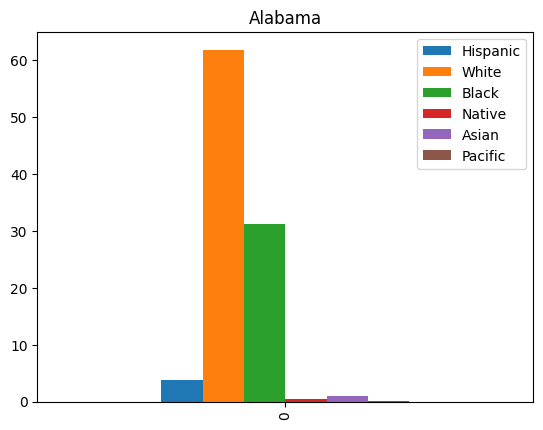

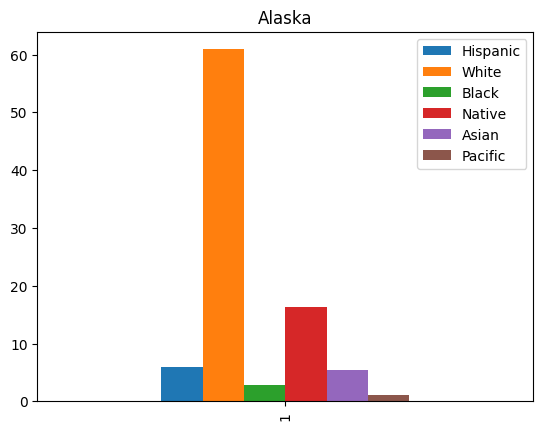

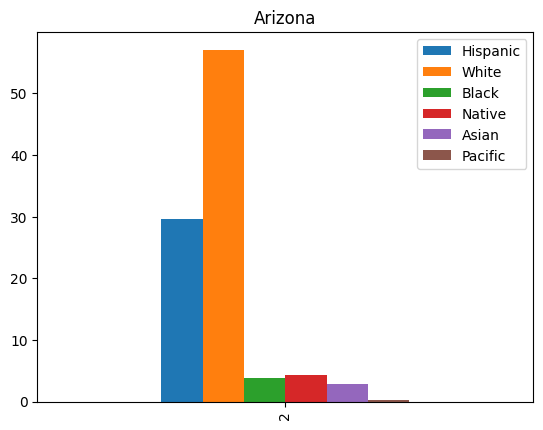

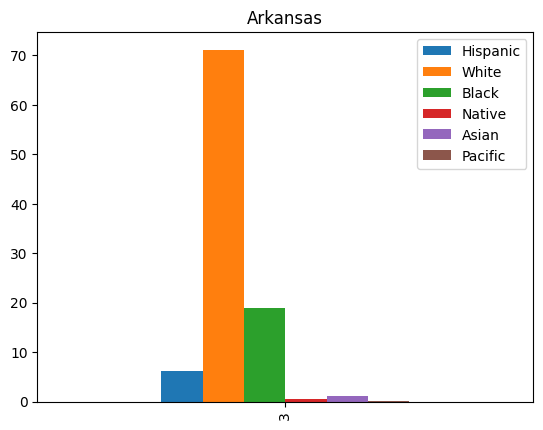

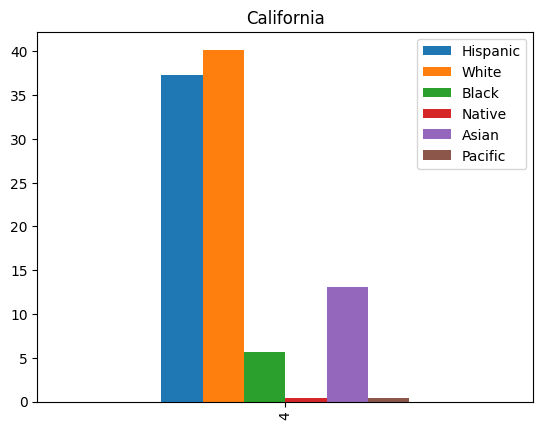

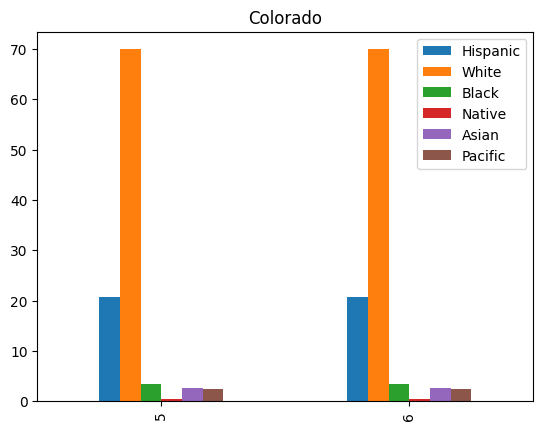

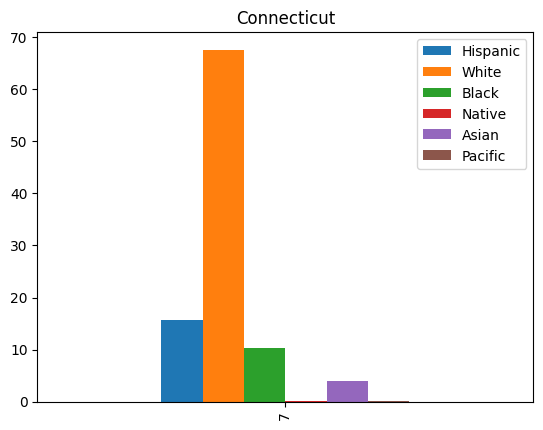

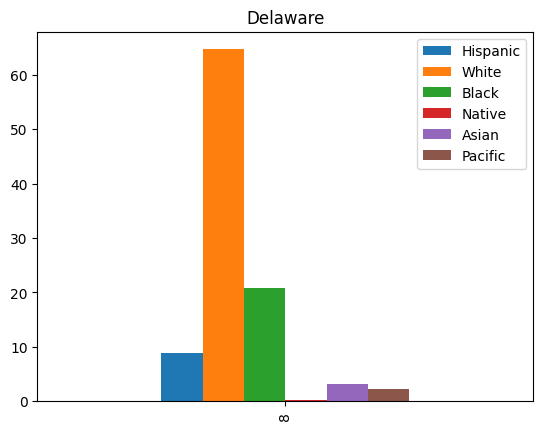

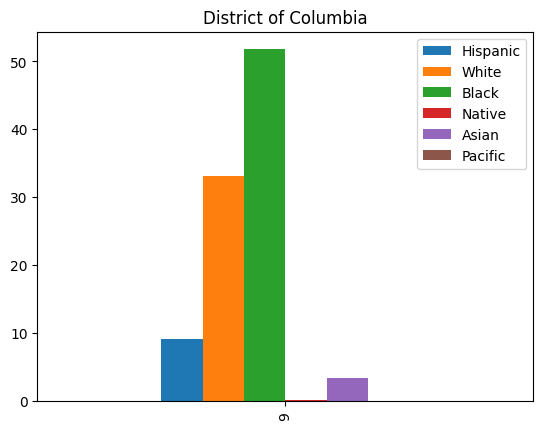

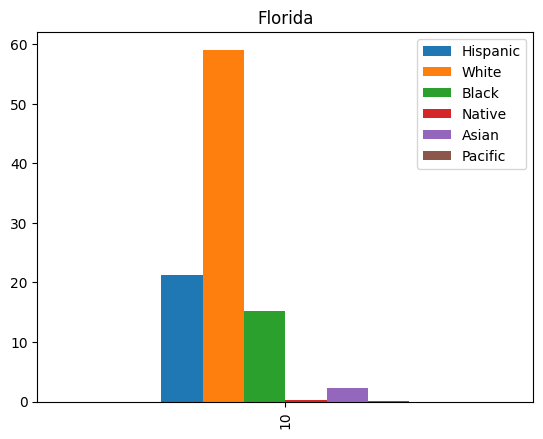

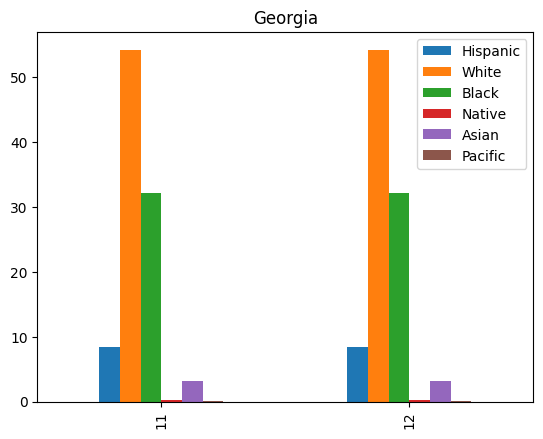

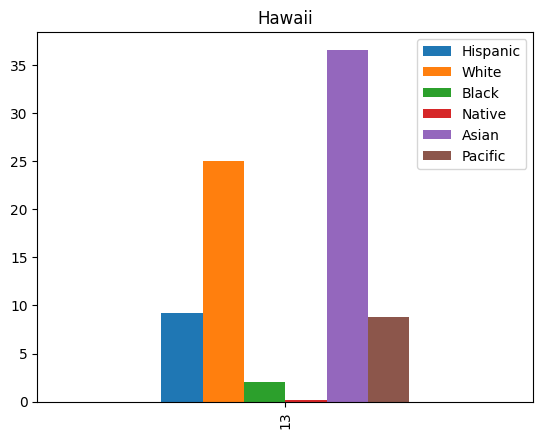

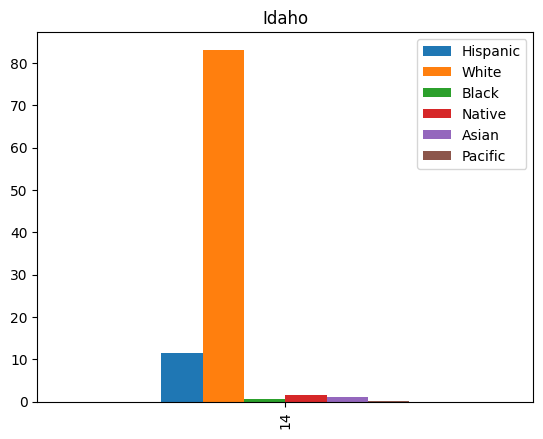

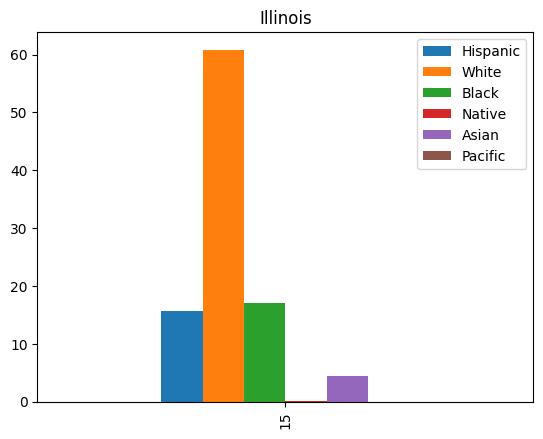

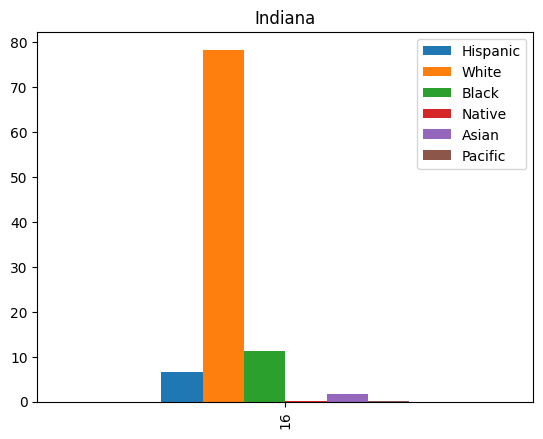

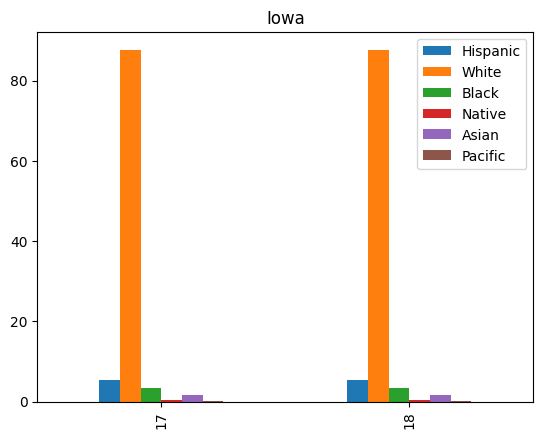

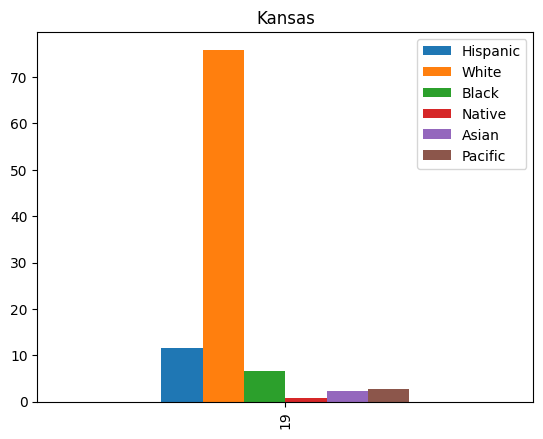

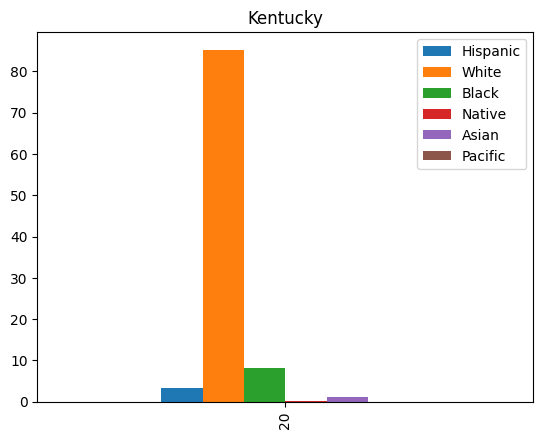

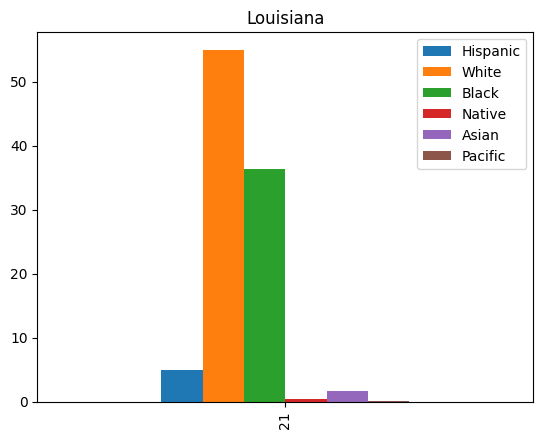

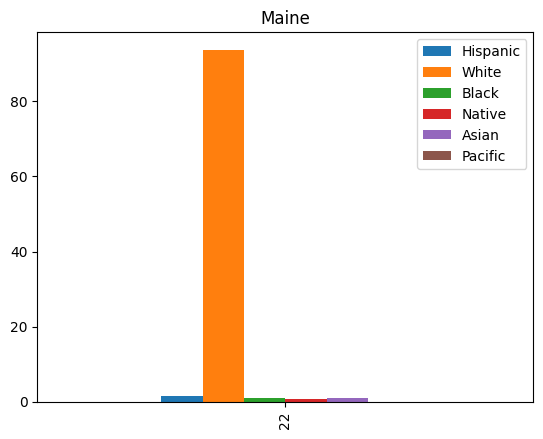

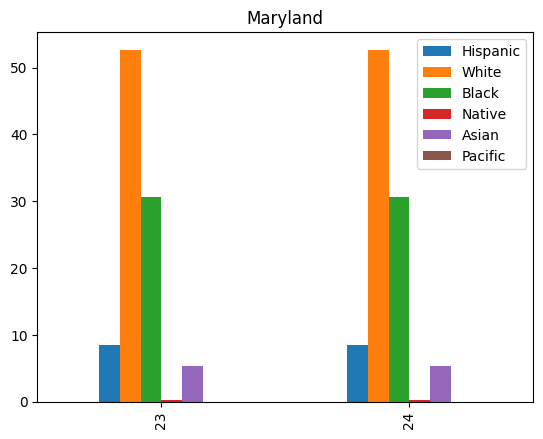

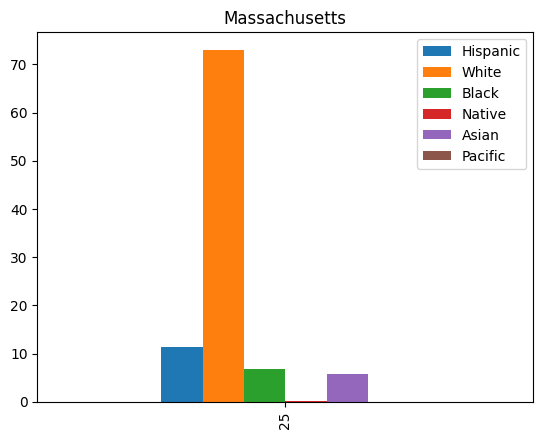

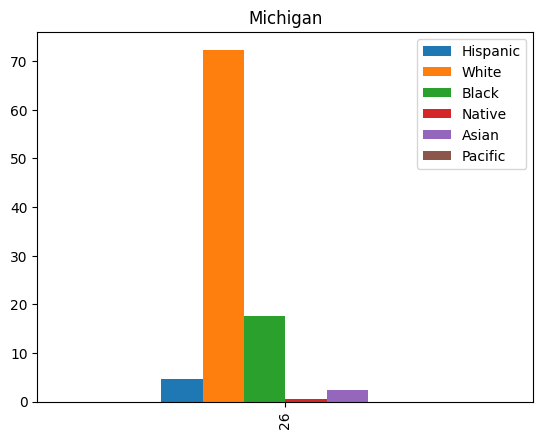

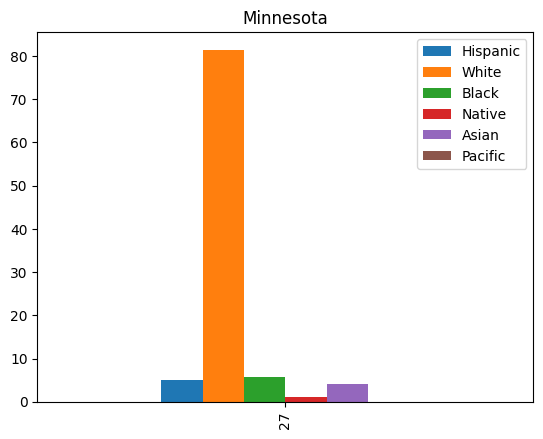

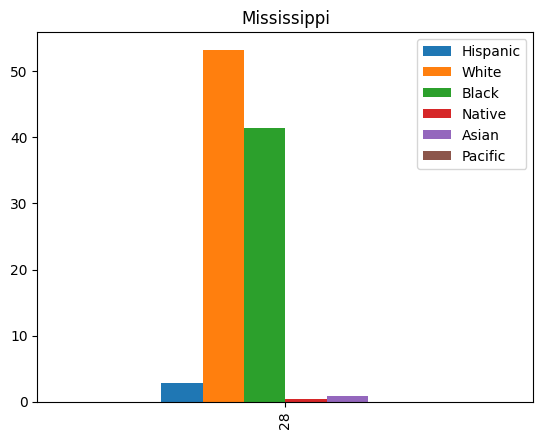

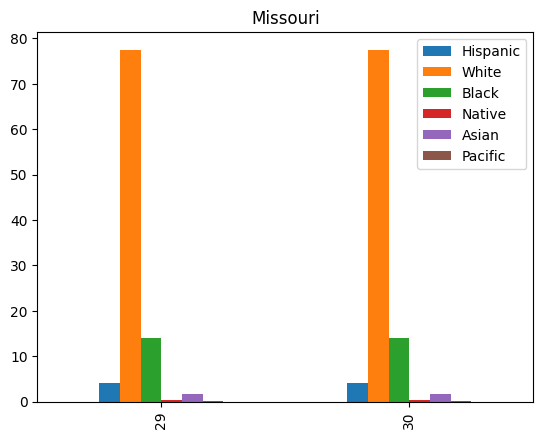

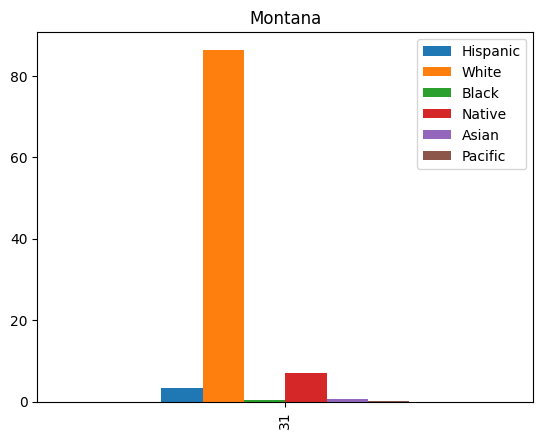

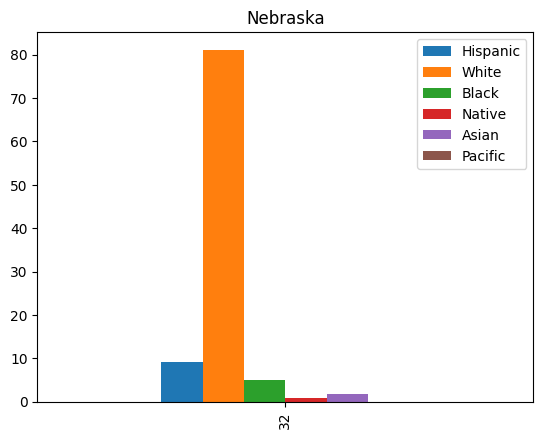

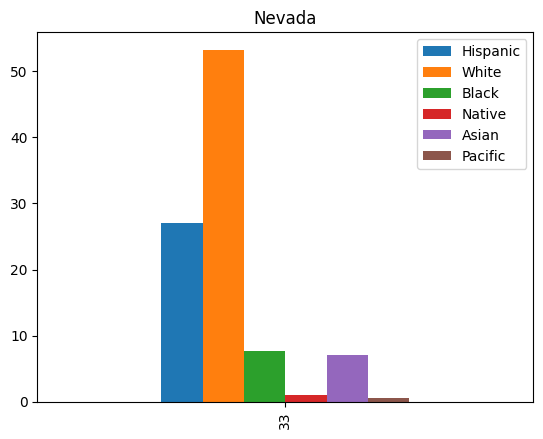

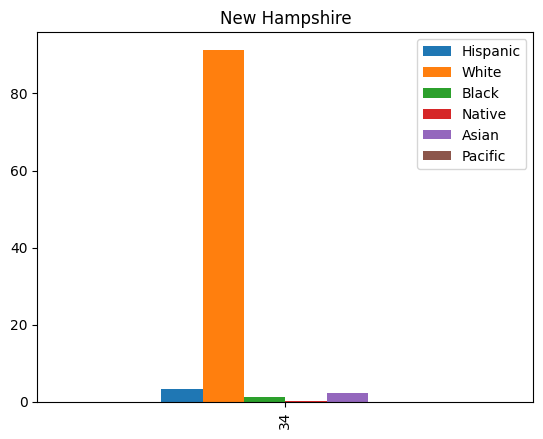

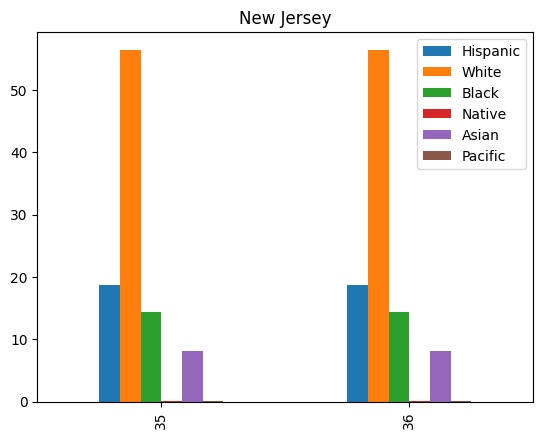

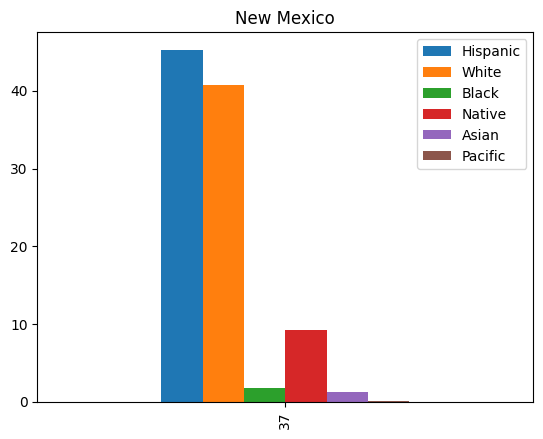

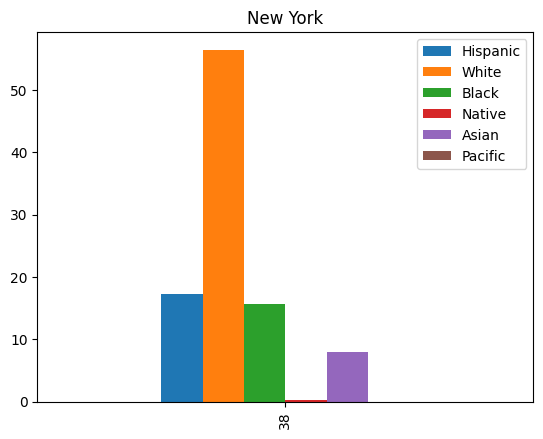

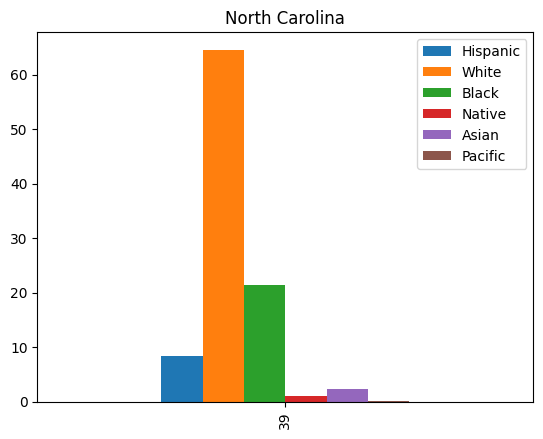

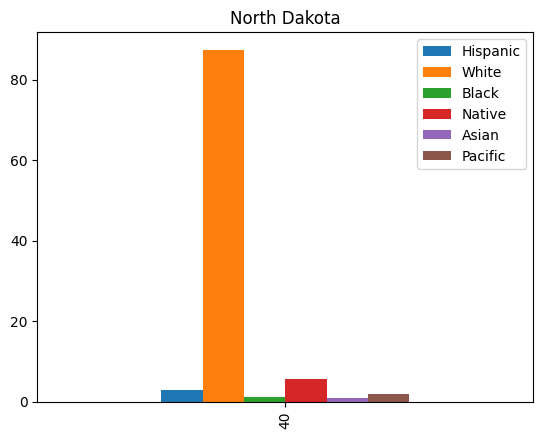

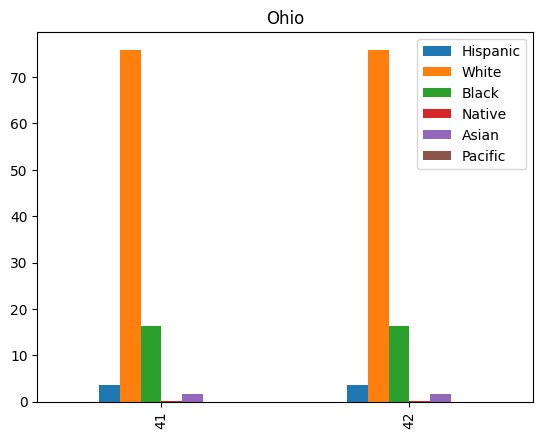

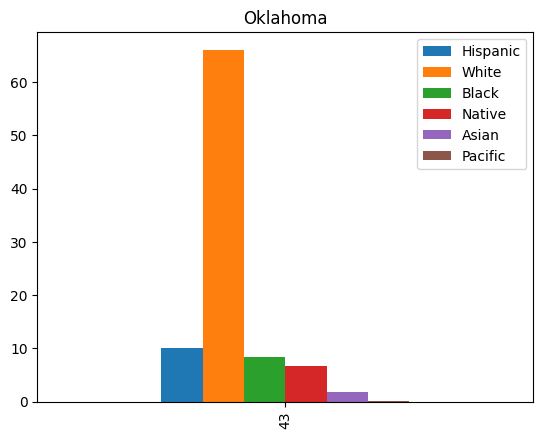

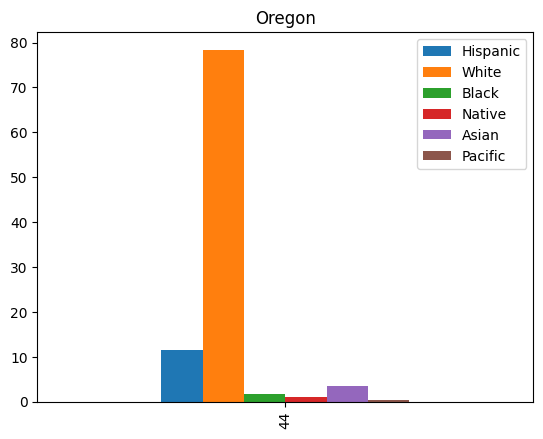

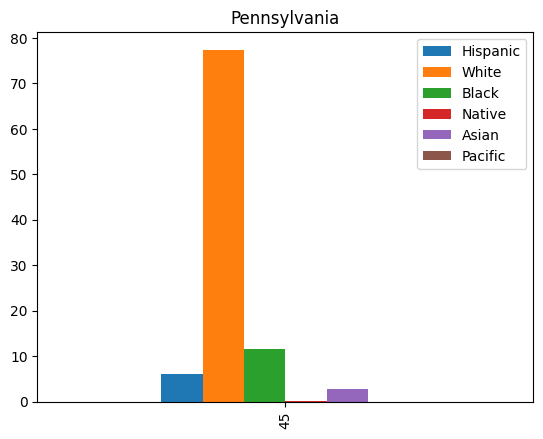

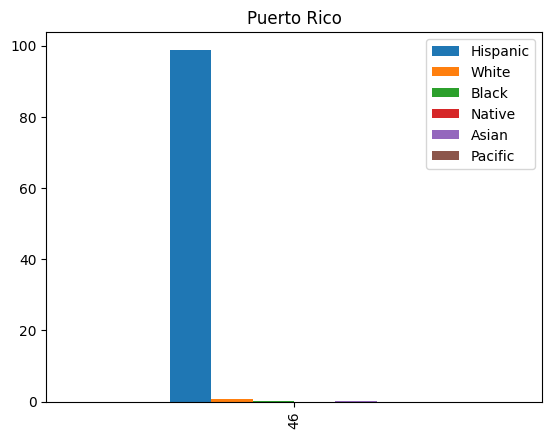

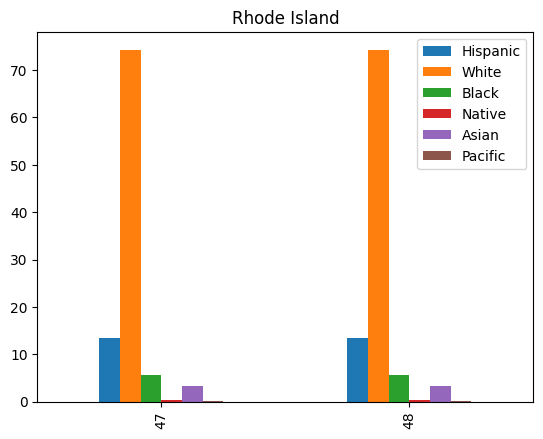

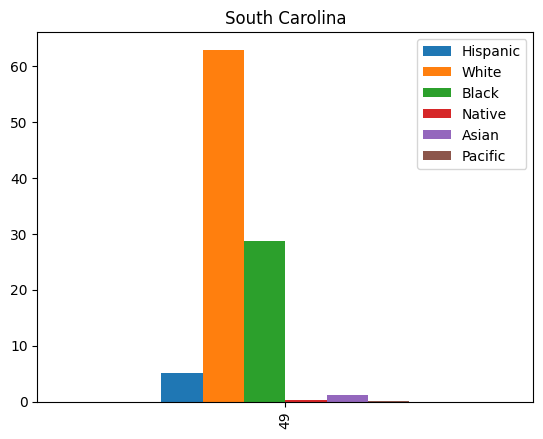

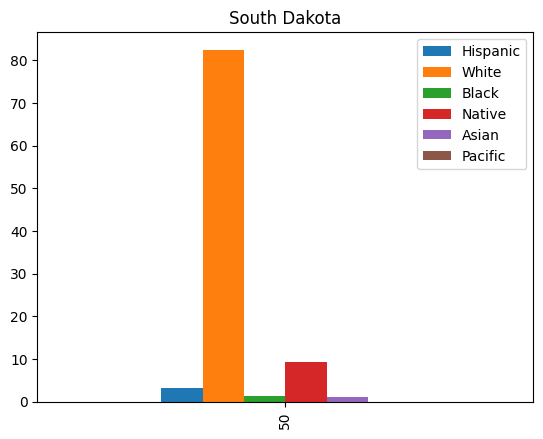

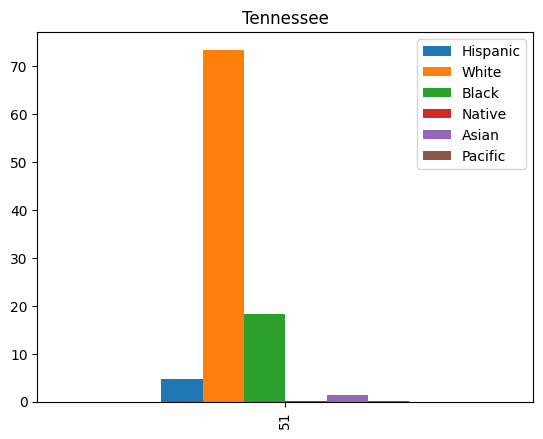

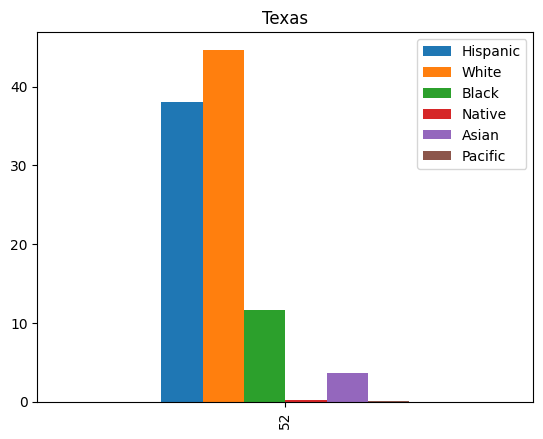

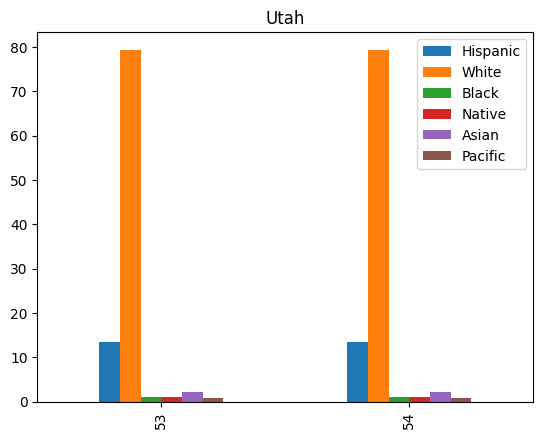

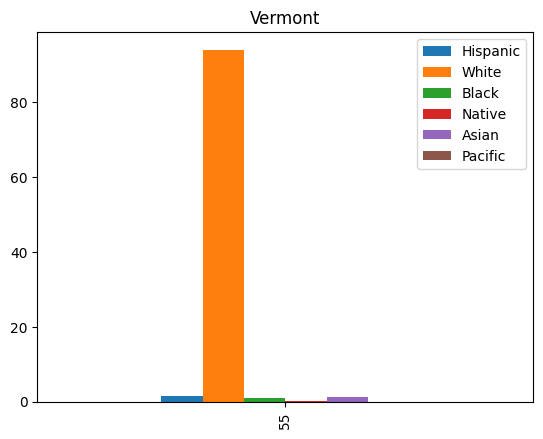

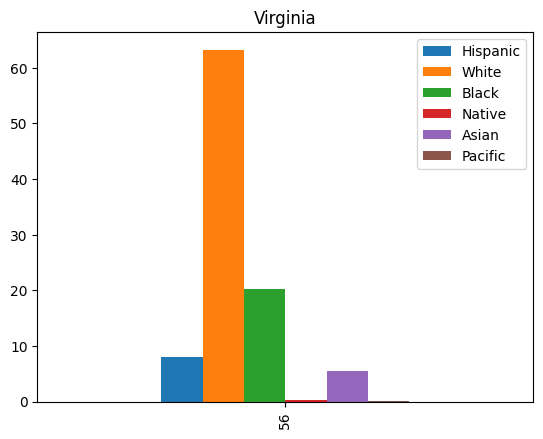

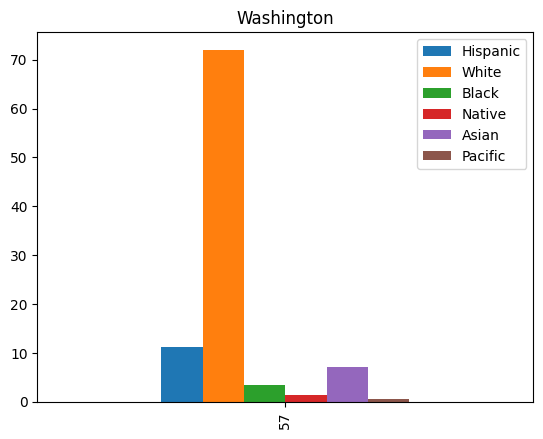

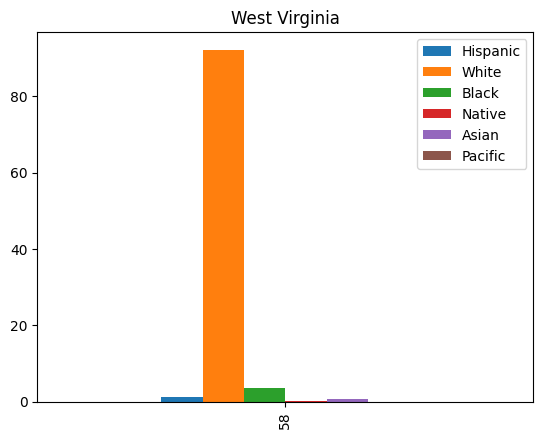

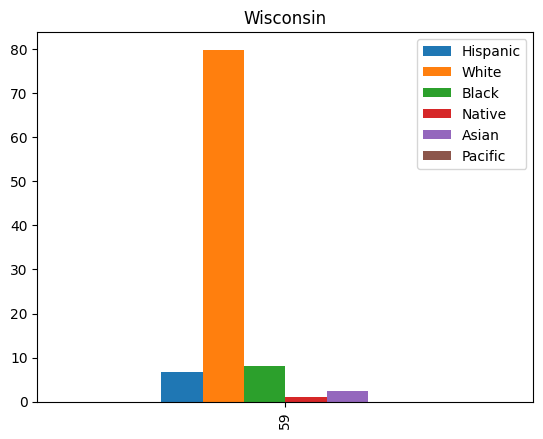

In [33]:
state_races = us_census.groupby('State')
race_cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for state,group in state_races:
    cls = group[race_cols].plot(kind =  'bar' , title= state)
    plt.show()